In [1]:
clc;
clear;
close all;

In [2]:
load 'ex5data1.mat'
whos

error: load: unable to find file ex5data1.mat


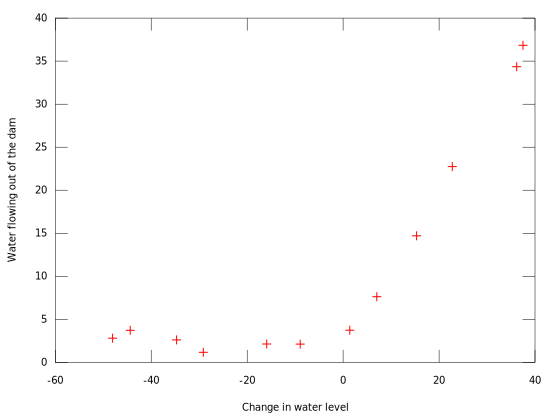

In [140]:
% 绘制数据
plot(X, y, 'r+', 'markersize', 3)
xlabel('Change in water level')
ylabel('Water flowing out of the dam')

In [141]:
% compute cost function
function [J, grad] = linearRegComputeCost(theta, X, y, lambda)
    m = length(y);
    h = X * theta;
    J = (1 / (2 * m)) * sum((h - y) .^ 2);
    J += (lambda / (2 * m)) * sum(theta(2:end) .^ 2);
    
    grad = (1 / m) * X' * (h - y) + (lambda / m) * theta;
    grad(1) -= lambda / m * theta(1);
end

In [142]:
m = length(y);
xMat = [ones(m, 1), X];
theta = [1;1];
[J, grad] = linearRegComputeCost(theta, xMat, y, 1)

J =  303.99
grad =

   -15.303
   598.251



In [143]:
theta = [0; 0];
options = optimset('GradObj', 'on', 'MaxIter', 50);
theta = fminunc(@(t) linearRegComputeCost(t, xMat, y, 0), theta, options);
theta

theta =

   13.08790
    0.36778



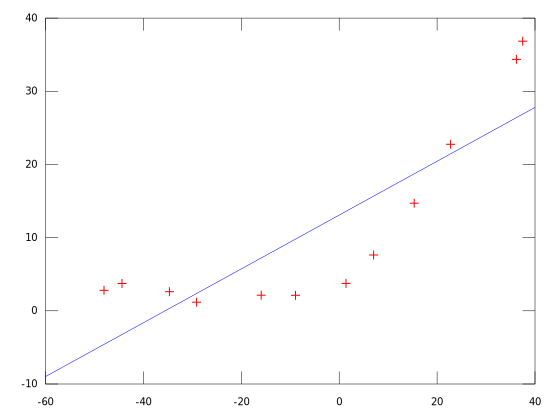

In [144]:
% 绘制回归出来的图形
hold on
plot(X, y, 'r+', 'markersize', 3);
x1 = [-60:0.1:40];
y1 = theta(1) + theta(2) * x1;
plot(x1, y1, 'b-')
hold off

### Learning Curves

In [145]:
function [error_train, error_val] = learningCurve(X, y, Xval, yval, lambda)
    m = length(y);
    error_train = zeros(m, 1);
    error_val = zeros(m, 1);
    
    xMat = [ones(m, 1), X];
    xValMat = [ones(length(yval), 1), Xval];
    options = optimset('GradObj', 'on', 'MaxIter', 50);

    for i = 1:m
        init_theta = zeros(size(xMat, 2), 1);
        theta = fminunc(@(t) linearRegComputeCost(t, xMat(1:i, :), y(1:i), 1), init_theta, options);
        error_train(i) = 1 / (2 * i) * sum((xMat(1:i, :) * theta - y(1:i)) .^ 2);
        error_val(i) = 1 / (2 * length(yval)) * sum((xValMat * theta - yval) .^ 2);
    end
end

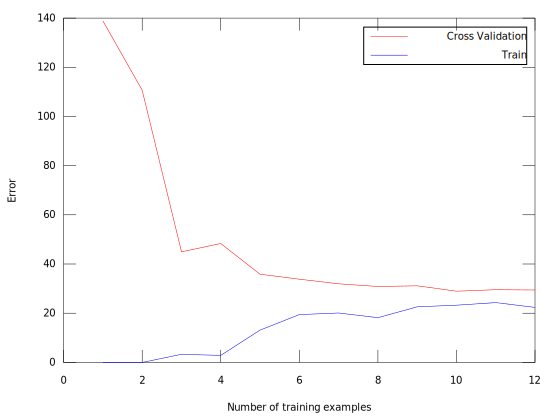

In [146]:
[et, ev] = learningCurve(X, y, Xval, yval, 1);
x2 = [1:12];
hold on;
plot(x2, ev, 'r-');
plot(x2, et, 'b-');
legend('Cross Validation', 'Train')
xlabel('Number of training examples')
ylabel('Error')
hold off;

从数据展示上来看，我们的数据模型是非线性的。但是我们的训练模型却是线性的，当你我们选择用线性模型去训练非线性样本数据时，即使非常多的样本数据，我们也很难去捕捉到数据的结构。

### Features Map
用两个参数你永远只能拟合出一条直线，就会有 high-bias, 所以我们需要添加更多的参数来进行拟合更完美的曲线。

In [147]:
function [X_poly] = polyFeatures(X, p)
    m = size(X, 1);
    X_poly = zeros(m, p);
    for i = 1:p
        X_poly(:, i) = X .^ i;
    end
end

% 特征 Normalization，我们需要保存下来，因为在预测的时候会用到了。
function [X_norm, mu, sigma] = featureNormalize(X)
    mu = mean(X);
    X_norm = bsxfun(@minus, X, mu);
    sigma = std(X_norm);
    X_norm = bsxfun(@rdivide, X, sigma);  
end

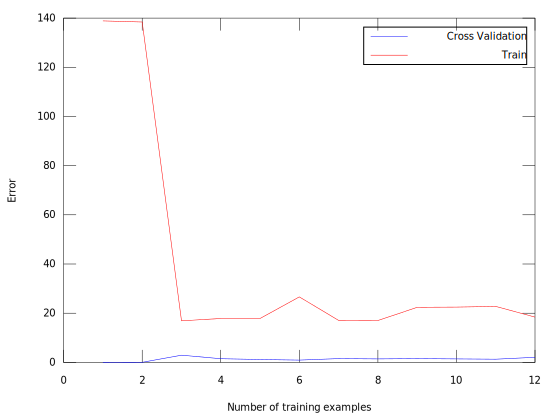

In [164]:
% 用 Features Map 后，增加更多的参数后，来看下我们的学习曲线。
X_poly = polyFeatures(X, 8);
[X_poly_norm, X_mu, X_sigma] = featureNormalize(X_poly);

% 注意，我们的 validation, test 的样本在做 normalization 的时候，需要根据训练样本的 mu, sigma 来计算。
Xval_poly = polyFeatures(Xval, 8);
Xval_poly = bsxfun(@minus, Xval_poly, X_mu);
Xval_poly_norm = bsxfun(@rdivide, Xval_poly, X_sigma);

[err_train, err_val] = learningCurve(X_poly_norm, y, Xval_poly_norm, yval, 1);
x2 = [1:12];
hold on;
plot(x2, err_train, 'b-');
plot(x2, err_val, 'r-');
legend('Cross Validation', 'Train')
xlabel('Number of training examples')
ylabel('Error')
hold off;

[m, n] = size(X_poly_norm);
theta = zeros(n + 1, 1);
theta = fminunc(@(t) linearRegComputeCost(t, [ones(m, 1) X_poly_norm], y, 0), theta, options);

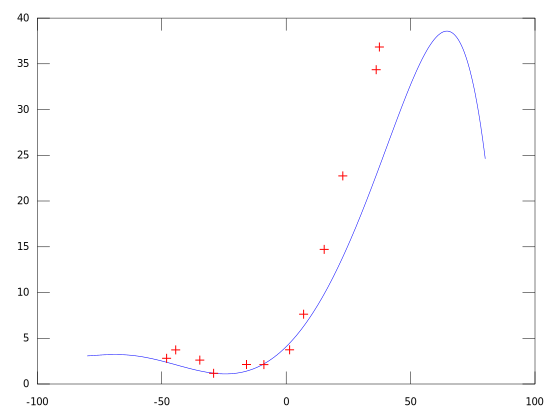

In [159]:
x3 = [-80:0.05:80]';
x3_poly = polyFeatures(x3, 8);
[x3_poly_norm, x3_mu, x3_sigma] = featureNormalize(x3_poly);
x3_poly_norm = [ones(size(x3), 1) x3_poly_norm];

hold on
plot(x3, x3_poly_norm * theta, 'b-')
plot(X, y, 'r+', 'markersize', 3);
hold off